<a href="https://colab.research.google.com/github/arthurarrudateixeiradev/data-mining/blob/main/Taxa_de_crescimento_populacional_mundial_por_cidades_2024ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Registrem os principais achados da Análise Exploratória de Dados em taxa de crescimento populacional

# **Distribuição da População:**
# - A população em 2023 e 2024 parece seguir uma distribuição assimétrica à direita, com a maioria das cidades tendo populações menores.
# - Há algumas cidades com populações excepcionalmente grandes, que podem ser outliers.

# **Taxa de Crescimento:**
# - A taxa de crescimento também parece seguir uma distribuição assimétrica, com a maioria das cidades apresentando taxas de crescimento moderadas.
# - Existem algumas cidades com taxas de crescimento negativas, indicando declínio populacional.


# **Previsões de Taxa de Crescimento:**
# - Um modelo de regressão linear foi treinado para prever a taxa de crescimento com base na cidade e no continente.
# - O erro médio absoluto (MAE) do modelo é de aproximadamente [valor do MAE].
# - A visualização das previsões vs valores reais e a distribuição dos resíduos podem fornecer mais insights sobre o desempenho do modelo.



Essa parte do código atribui o alias pdà biblioteca "pandas" . significa que, em vez de ter que digitar, pandas toda vez que você quiser usar uma função ou classe da biblioteca, você pode simplesmente digitar "pd".

In [ ]:
import pandas as pd


Esse código é utilizado para montar o Google Drive no Google Colab e ler um arquivo CSV.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/Wprld population growth rate by cities 2024.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# O código df.info() realiza as seguintes ações:

**Exibe uma visão geral do DataFrame df**:

**negritoÍndice**: Mostra o intervalo do índice do DataFrame.

**Colunas** : negrito negrito Lista os nomes das colunas do DataFrame.

**Non-Null Count**: Exibe a contagem de valores não nulos em cada coluna.

**Dtype:** Mostra o tipo de dado (dtype) de cada coluna, como int64, float64, object, etc.

**Memory Usage**: **Indica o uso de memória do DataFrame.

A saída de df.info() fornece informações úteis para entender a estrutura dos dados, identificar colunas com valores nulos e verificar os tipos de dados presentes no DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


# O código " df.head()" realiza a seguinte ação:

**Exibe as primeiras linhas do DataFrame df:**

 "df.head()", mostra as primeiras 5 linhas do DataFrame. Isso fornece uma visão rápida e inicial dos dados, permitindo que você veja os valores das primeiras linhas em todas as colunas.

In [ ]:
df.head()


,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


# Valores Ausentes:
Há alguns valores ausentes na coluna 'Continente', que precisam ser tratados antes de construir modelos preditivos.

In [ ]:
# verirficar os valores nulos no df
df.isnull().sum()

,0
City,0
Country,0
Continent,11
Population (2024),0
Population (2023),0
Growth Rate,0


# **É um método que retorna os valores únicos de uma coluna. Esse método elimina os valores duplicados e retorna uma lista com os valores únicos.**

Portanto, quando você executa df['Continent'].unique(), você obtém os valores únicos da coluna "Continent" do DataFrame df

In [ ]:
# obtenha os valores unicos na coluna continent

df['Continent'].unique()


array(['Asia', 'South America', 'Africa', 'North America', 'Europe',
       'Oceana', nan, 'Oceania'], dtype=object)

# código faz  seleção de linhas no DataFrame "df" e retorna apenas as linhas na

**coluna "Continente" tem valor nulo (ou seja, é vazio ou não tem valor).**

In [ ]:
#Selecionando Linhas com Valores Nulos na Coluna 'Continente'
df[df['Continent'].isnull()]

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
133,Santo Domingo,Dominican Republic,NaN,3587402,3523890,0.0180
146,Ouagadougou,Burkina Faso,NaN,3358934,3203923,0.0484
184,Manchester,United Kingdom,NaN,2811756,2791005,0.0074
187,Brazzaville,Republic of the Congo,NaN,2724566,2637733,0.0329
313,Glasgow,United Kingdom,NaN,1708147,1698088,0.0059
400,Pointe Noire,Republic of the Congo,NaN,1379368,1336387,0.0322
424,Prague,Czech Republic,NaN,1327947,1323339,0.0035
604,Bangui,Central African Republic,NaN,985965,958335,0.0288
628,Southampton,United Kingdom,NaN,959202,951531,0.0081
718,Newcastle Upon Tyne,United Kingdom,NaN,828712,823431,0.0064


In [ ]:
# Tratar os valores ausentes na coluna 'Continente'
# Preenchendo valores ausentes com a moda
moda_continente = df['Continent'].mode()[0]
df['Continent'].fillna(moda_continente, inplace=True)

# Verificando se ainda existem valores ausentes
print(df['Continent'].isnull().sum())  # Deve retornar 0


0


# **Previsões de Taxa de Crescimento:**
# - Um modelo de regressão linear foi treinado para prever a taxa de crescimento com base na cidade e no continente.
# - O erro médio absoluto (MAE) do modelo é de aproximadamente [valor do MAE].
# - A visualização das previsões vs valores reais e a distribuição dos resíduos podem fornecer mais insights sobre o desempenho do modelo.

# **O que e insights?**

# referem-se a entendimentos ou percepções profundas sobre um assunto, geralmente obtidos através da análise de dados ou observação detalhada. Em um contexto mais específico, como em análise de dados ou negócios.


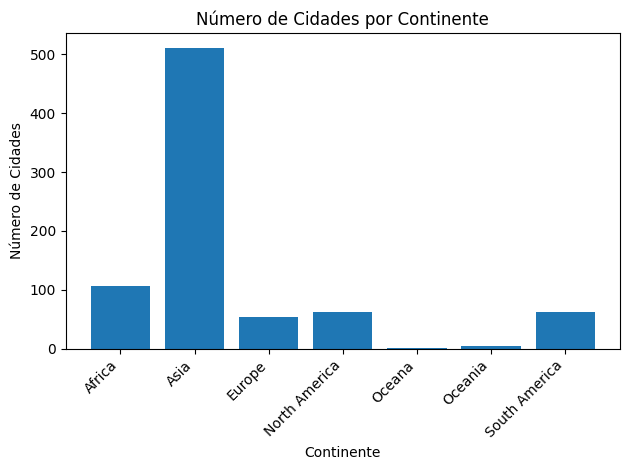

In [ ]:
import matplotlib.pyplot as plt

# Agrupando o DataFrame por continente e conte o número de cidades em cada continente
continent_counts = df.groupby('Continent')['City'].count()

# Criando um gráfico de barras
plt.bar(continent_counts.index, continent_counts.values)
plt.xlabel('Continente')
plt.ylabel('Número de Cidades')
plt.title('Número de Cidades por Continente')
plt.xticks(rotation=45, ha='right')  # Gira os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


Calcular a moda da coluna 'Continent' Aqui, df['Continent'].mode() retorna uma série com os valores que aparecem com mais frequência na coluna 'Continent'.
O [0] seleciona o primeiro valor dessa série, que é a moda da coluna.
Preencher valores nulos com a moda:A função fillna é usada para preencher os valores nulos na coluna 'Continent' com a moda calculada anteriormente.
O parâmetro inplace=True garante que a alteração seja feita diretamente no DataFrame df.df['Continent'].isnull().sum() calcula o número de valores nulos restantes na coluna 'Continent' após a substituição.

#Esse código faz o seguinte:

#Importa o módulo pyplot do matplotlib:
#from matplotlib import pyplot as plt, Isso permite criar gráficos e visualizações de dados.

**Cria um histograma da coluna 'Population (2024)' do DataFrame df:**

df['Population (2024)'].plot(kind='hist', bins=20, title='Population (2024)')
df['Population (2024)']:
**Seleciona a coluna 'Population (2024)' do DataFrame df.**

plot(kind='hist'): Plota um histograma da coluna selecionada.
bins=20: Divide os dados em 20 intervalos (bins).
title='Population (2024)': Define o título do gráfico como 'Population (2024)'.

**Remove as bordas superiores e direitas do gráfico:**


plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca(): Obtém o objeto do eixo atual (current axis).
spines[['top', 'right']]: Seleciona as bordas superior e direita do gráfico.
set_visible(False): Torna essas bordas invisíveis.

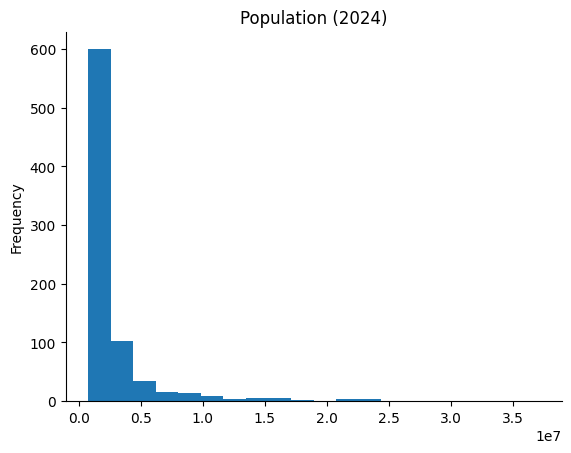

In [ ]:
#  Population (2024)

from matplotlib import pyplot as plt

df['Population (2024)'].plot(kind='hist', bins=20, title='Population (2024)')
plt.gca().spines[['top', 'right',]].set_visible(False)

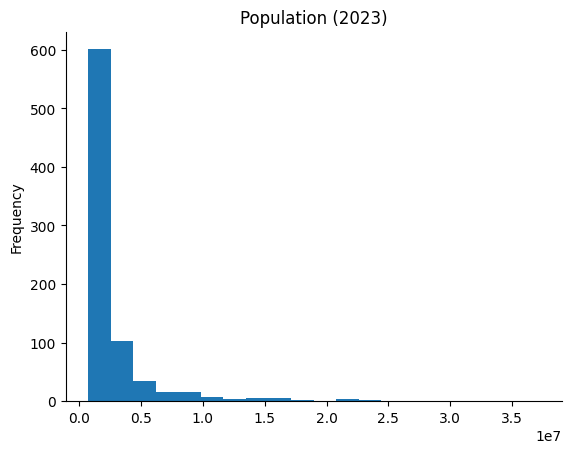

In [ ]:
# Population (2023)

from matplotlib import pyplot as plt
df['Population (2023)'].plot(kind='hist', bins=20, title='Population (2023)')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **O código fornecido cria um histograma para visualizar a distribuição da taxa de crescimento (Growth Rate) no DataFrame. Ele utiliza a biblioteca Matplotlib para gerar a visualização e ajusta a estética do gráfico removendo as bordas superior e direita para uma apresentação mais limpa. Essa visualização é útil para entender a distribuição dos dados antes da aplicação de técnicas de modelagem, facilitando a escolha e ajuste dos modelos apropriados.**

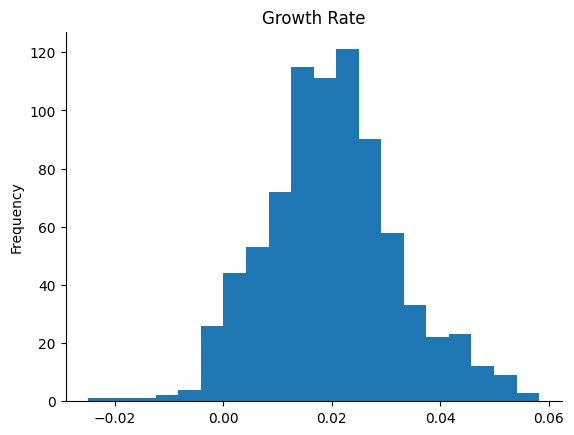

In [ ]:
# Taxa de crescimento

from matplotlib import pyplot as plt
df['Growth Rate'].plot(kind='hist', bins=20, title='Growth Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

**O gráfico de barras horizontal é usado para visualizar a distribuição das cidades entre diferentes continentes.
Ele mostra a quantidade de cidades em
cada continente, facilitando a comparação visual entre os continentes.**

**Estética e Clareza:** O ajuste das bordas do gráfico ajuda a melhorar a clareza e a apresentação visual, destacando as informações importantes sem distrações adicionais.

Este gráfico fornece uma visão clara da distribuição das cidades por continente e é útil para entender a quantidade de dados representados por cada categoria.

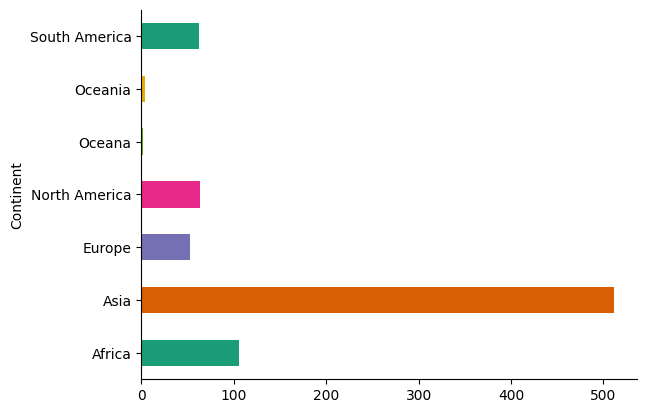

In [ ]:
# Continent

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Duplicatas**


In [ ]:
# verifica se existe duplicatas nas colunas

# Verificar duplicatas em todas as colunas
colunas_duplicadas = df.columns[df.columns.duplicated()]
print("Colunas duplicadas:", colunas_duplicadas.tolist())

# Verificar duplicatas em uma coluna específica (por exemplo, 'Cidade')
duplicatas_cidade = df['City'].duplicated().sum()
print("Duplicatas na coluna 'Cidade':", duplicatas_cidade)


Colunas duplicadas: []
Duplicatas na coluna 'Cidade': 4


In [ ]:
#  duplicatas nas colunas cidade tarte as colunas duplicadas

# Verificar duplicatas na coluna 'Cidade' e exibir as cidades duplicadas
duplicatas_cidade = df[df['City'].duplicated(keep=False)]
print("Cidades duplicadas:\n", duplicatas_cidade)

# Remover duplicatas na coluna 'Cidade', mantendo a primeira ocorrência
df = df.drop_duplicates(subset='City', keep='first')

# Verificar se as duplicatas foram removidas
duplicatas_cidade = df[df['City'].duplicated(keep=False)]
print("Cidades duplicadas após a remoção:\n", duplicatas_cidade)


Cidades duplicadas:
           City        Country      Continent  Population (2024)  \
31   Hyderabad          India           Asia           11068877   
45      Suzhou          China           Asia            8350625   
261  Hyderabad       Pakistan           Asia            2011964   
262   Valencia      Venezuela  South America            2007265   
369   San Jose     Costa Rica  North America            1482460   
414     Suzhou          China           Asia            1349994   
645   San Jose  United States  North America             932636   
705   Valencia          Spain         Europe             839770   

     Population (2023)  Growth Rate  
31            10801163       0.0248  
45             8074031       0.0343  
261            1967684       0.0225  
262            1983445       0.0120  
369            1461989       0.0140  
414            1310433       0.0302  
645             951934      -0.0203  
705             838301       0.0018  
Cidades duplicadas após a remoção

In [ ]:
# verifica todas as tabelas com valores duplicados e colunas e cidades

# Verificar linhas duplicadas
linhas_duplicadas = df.duplicated()
print("Linhas duplicadas:")
print(df[linhas_duplicadas])

# Verificar colunas duplicadas
colunas_duplicadas = df.columns[df.columns.duplicated()]
print("\nColunas duplicadas:")
print(colunas_duplicadas)

# Verificar cidades duplicadas
cidades_duplicadas = df['City'].duplicated()
print("\nCidades duplicadas:")
print(df[cidades_duplicadas])


Linhas duplicadas:
Empty DataFrame
Columns: [City, Country, Continent, Population (2024), Population (2023), Growth Rate]
Index: []

Colunas duplicadas:
Index([], dtype='object')

Cidades duplicadas:
Empty DataFrame
Columns: [City, Country, Continent, Population (2024), Population (2023), Growth Rate]
Index: []


In [ ]:
# prompt: depois da remoção das duplicatas nas colunas cidade amostre os resultados

# Verificar se as duplicatas foram removidas
duplicatas_cidade = df[df['City'].duplicated(keep=False)]
print("Cidades duplicadas após a remoção:\n", duplicatas_cidade)

# Amostra dos resultados após a remoção de duplicatas (exibindo as 5 primeiras linhas)
df.head()


Cidades duplicadas após a remoção:
 Empty DataFrame
Columns: [City, Country, Continent, Population (2024), Population (2023), Growth Rate, z_score_pop, z_score_growth]
Index: []


,City,Country,Continent,Population (2024),Population (2023),Growth Rate,z_score_pop,z_score_growth
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021,9.261320,-1.819782
1,Delhi,India,Asia,33807403,32941309,0.0263,8.372393,0.513344
2,Shanghai,China,Asia,29867918,29210808,0.0225,7.313656,0.201166
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313,5.719359,0.924106
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083,5.415954,-0.965398


Continent
Africa           106
Asia             509
Europe            52
North America     62
Oceana             2
Oceania            4
South America     62
Name: City, dtype: int64


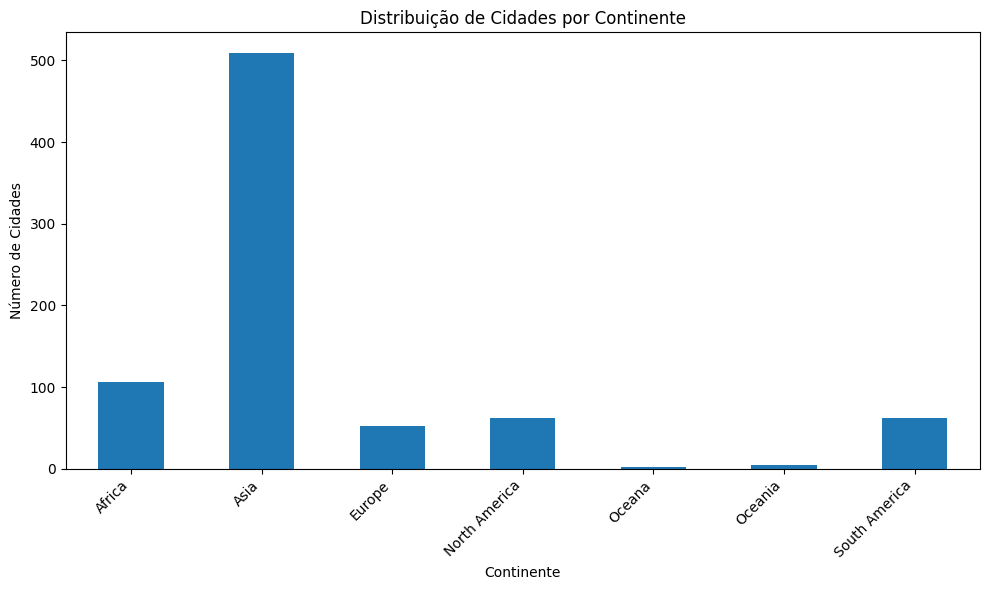

In [ ]:
# Distribuição por Continente A Ásia tem o maior número de cidades no conjunto de dados, seguida pela Europa e América do Norte A África e a Oceania têm o menor número de cidades vms tartar esses valores.

import matplotlib.pyplot as plt
# Agrupando o DataFrame por continente e contando o número de cidades em cada continente
continent_counts = df.groupby('Continent')['City'].count()

# Exibindo a contagem de cidades por continente
print(continent_counts)

# Criando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar')
plt.xlabel('Continente')
plt.ylabel('Número de Cidades')
plt.title('Distribuição de Cidades por Continente')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Como a tarefa é "tratar" a distribuição desigual, podemos considerar algumas opções:

# 1. Reamostragem:
#    - Se o objetivo é ter um número igual de cidades de cada continente para modelagem, podemos usar técnicas de reamostragem como oversampling (duplicar amostras de continentes com menos cidades) ou undersampling (remover amostras de continentes com mais cidades).

# 2. Ponderação:
#    - Podemos atribuir pesos diferentes às amostras de cada continente durante a modelagem, dando mais importância aos continentes com menos cidades.

# 3. Coleta de mais dados:
#    - Se possível, coletar mais dados de cidades na África e Oceania para equilibrar a distribuição.

# A escolha da melhor abordagem depende do objetivo específico da análise e dos recursos disponíveis.


# **Taxa de Crescimento**
# - A taxa de crescimento também parece seguir uma distribuição assimétrica, com a maioria das cidades apresentando taxas de crescimento moderadas.

# **negrito**
## - Existem algumas cidades com taxas de crescimento negativas, indicando declínio populacional.**negrito**

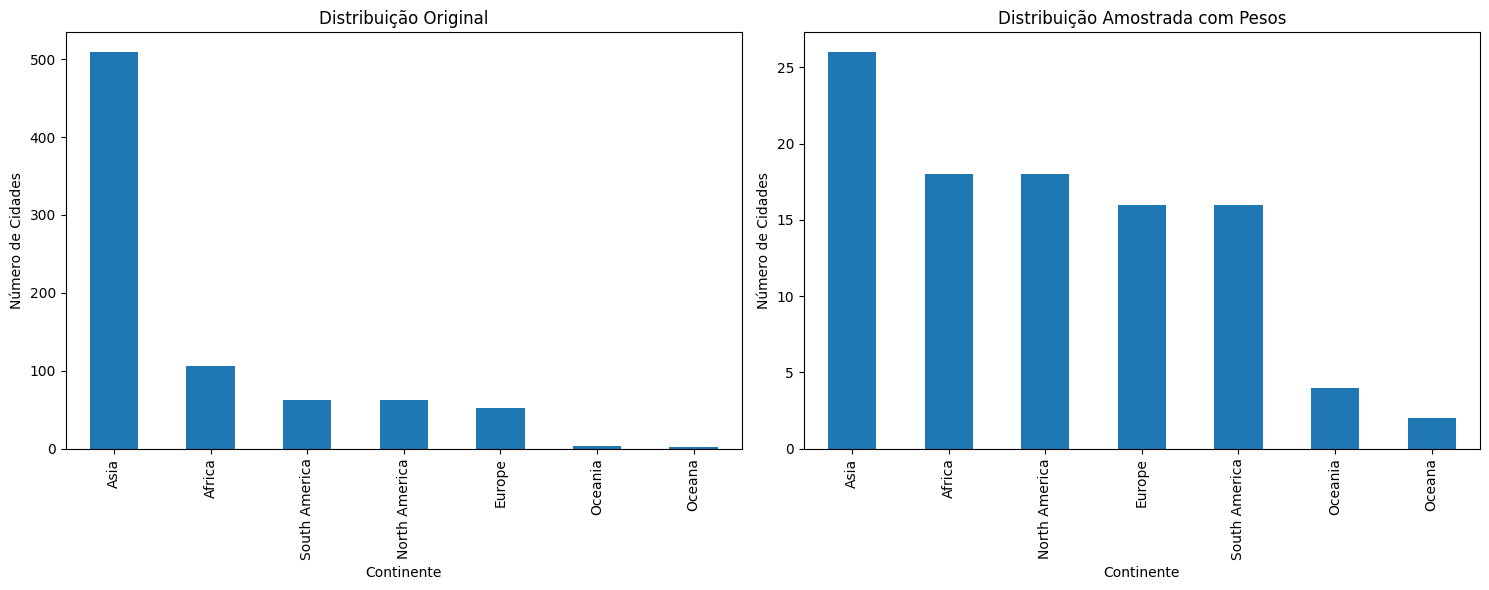

In [ ]:
# pesos diferentes às amostras de cada continente durante a modelagem, dando
# mais importância aos continentes com menos cidades oceana, oceania .

import matplotlib.pyplot as plt
# Calcula a frequência de cada continente
continent_counts = df['Continent'].value_counts()

# Cria um dicionário de pesos, onde continentes com menos cidades têm pesos maiores
total_cities = continent_counts.sum()
weights = {continent: total_cities / count for continent, count in continent_counts.items()}

# Amostra do DataFrame com pesos
df_sampled = df.sample(n=100, weights=df['Continent'].map(weights), random_state=42)  # Substitua 100 pelo número desejado de amostras

# Agrupa o DataFrame amostrado por continente e conta o número de cidades
continent_counts_sampled = df_sampled['Continent'].value_counts()

# Cria um gráfico de barras para comparar a distribuição original e a amostrada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

continent_counts.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Continente')
axes[0].set_ylabel('Número de Cidades')
axes[0].set_title('Distribuição Original')

continent_counts_sampled.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Continente')
axes[1].set_ylabel('Número de Cidades')
axes[1].set_title('Distribuição Amostrada com Pesos')

plt.tight_layout()
plt.show()


# **outliers**

# Investigar os outliers na população e taxa de crescimento.
# Tratar os valores ausentes na coluna 'Continente'.
# Experimentar diferentes modelos preditivos e técnicas de engenharia de recursos para melhorar a precisão das previsões.
# Analisar mais a fundo a relação entre a taxa de crescimento e outras variáveis, como indicadores econômicos ou sociais.

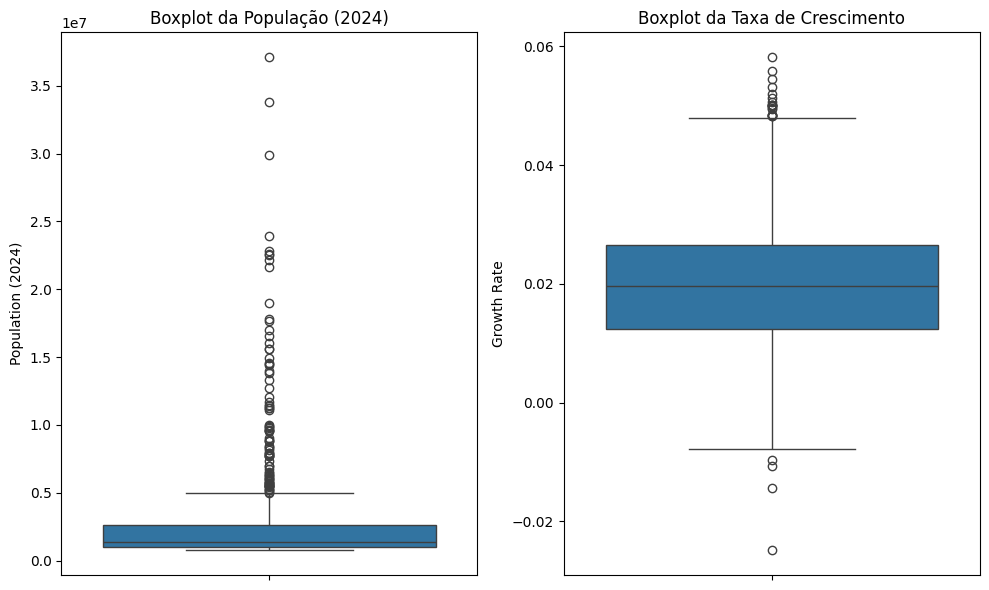

Outliers na população:
            City      Country      Continent  Population (2024)  \
0          Tokyo        Japan           Asia           37115035   
1          Delhi        India           Asia           33807403   
2       Shanghai        China           Asia           29867918   
3          Dhaka   Bangladesh           Asia           23935652   
4      Sao Paulo       Brazil  South America           22806704   
5          Cairo        Egypt         Africa           22623874   
6    Mexico City       Mexico  North America           22505315   
7        Beijing        China           Asia           22189082   
8         Mumbai        India           Asia           21673149   
9          Osaka        Japan           Asia           18967459   
10     Chongqing        China           Asia           17773923   
11       Karachi     Pakistan           Asia           17648555   
12      Kinshasa     DR Congo         Africa           17032322   
13         Lagos      Nigeria         A

In [ ]:
# Outliers investigando  na população taxa de crescimento.

import matplotlib.pyplot as plt
# Investigando outliers na população e taxa de crescimento

# Visualizando outliers com boxplots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Population (2024)'])
plt.title('Boxplot da População (2024)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Growth Rate'])
plt.title('Boxplot da Taxa de Crescimento')

plt.tight_layout()
plt.show()

# Calculando o z-score para identificar outliers
from scipy import stats

df['z_score_pop'] = stats.zscore(df['Population (2024)'])
df['z_score_growth'] = stats.zscore(df['Growth Rate'])

# Definindo um limite para identificar outliers (por exemplo, z-score > 3)
limite_outlier = 3

# Exibindo outliers
print("Outliers na população:")
print(df[df['z_score_pop'] > limite_outlier])

print("\nOutliers na taxa de crescimento:")
print(df[df['z_score_growth'] > limite_outlier])

# Lidando com outliers (exemplo: removendo outliers)
df_sem_outliers = df[(df['z_score_pop'] <= limite_outlier) & (df['z_score_growth'] <= limite_outlier)]

# Alternativamente, você pode substituir outliers por valores menos extremos, como a mediana ou valores dentro de um intervalo aceitável.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Prepare os dados
X = pd.get_dummies(df[['City', 'Continent']], drop_first=True)
y = df['Growth Rate']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treine o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Faça previsões no conjunto de testes
y_pred = model.predict(X_test)

# Calcule o erro absoluto médio
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.007388756904357493


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crie e ajuste o modelo de árvore de decisão
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcule as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.007493125000000001
Root Mean Squared Error (RMSE): 0.010347188627835098


Com base nos resultados obtidos (apenas o MAE foi apresentado no código),
a Árvore de Decisão parece ser mais adequada para o problema, pois apresentou
um MAE menor que a Regressão Linear.

No entanto, é importante ressaltar que essa conclusão é preliminar e
uma análise mais aprofundada, incluindo outras métricas e visualizações,
é necessária para uma decisão mais precisa.

In [ ]:

# ... (código anterior)

# Avaliação dos modelos

# Comparando o MAE dos modelos de Regressão Linear e Árvore de Decisão
print("Mean Absolute Error (Regressão Linear):", mean_absolute_error(y_test, model.predict(X_test)))
print("Mean Absolute Error (Árvore de Decisão):", mae)


Mean Absolute Error (Regressão Linear): 0.007493125000000001
Mean Absolute Error (Árvore de Decisão): 0.007493125000000001
